In [25]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

df = pd.read_csv('data/data_superset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,State,City,agyaddr,xobsyr_0,Illicit_Days5,Illicit_Cens5,female_cd,nonwhite_cd,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,primsev_cd_1,primsev_cd_2,primsev_cd_3,primsev_cd_4,primsev_cd_5,primsev_cd_6,B2a_0g,SUDSy_0,Address,lat,lng,state_name,county_FIPS,block_FIPS,murder_numg,%_dropoutg,%_povertyg,%_public_assistanceg,%_unemployedg,closest,gran,point,pop_deng
0,0,1,2,929,OH,Cleveland,1276 West Third St. #400,2006,354,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2,1,0,0,0,0,0,0,3,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,Ohio,39035.0,3.903511e+14,0,0.0,0.0,0.0,0.0,NaN,0.0,"('41.501028000000005', '-81.697772')",0.0
1,1,2,3,951,OH,Cleveland,1276 West Third St. #400,2006,365,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,2,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,Ohio,39035.0,3.903511e+14,0,0.0,0.0,0.0,0.0,NaN,0.0,"('41.501028000000005', '-81.697772')",0.0
2,2,3,4,1032,OH,Cleveland,1276 West Third St. #400,2006,365,0,0,0,0,0,2,0,1,1,1,1,1,0,2,1,0,2,0,0,1,0,0,0,0,2,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,Ohio,39035.0,3.903511e+14,0,0.0,0.0,0.0,0.0,NaN,0.0,"('41.501028000000005', '-81.697772')",0.0
3,3,18,19,1673,KY,Louisville,1220 Bardstown Rd,2006,365,0,0,0,0,0,0,0,0,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0,0,2,"1220 Bardstown Rd, Louisville, KY",38.236398,-85.717815,Kentucky,21111.0,2.111101e+14,0,0.0,0.0,0.0,0.0,NaN,0.0,"('38.236397499999995', '-85.7178152')",0.0
4,4,21,22,3870,AZ,Tucson,3130 E Broadway Blvd,2006,5,1,0,0,0,1,2,1,2,2,2,1,2,1,1,2,2,2,0,0,1,0,0,0,0,11,"3130 E Broadway Blvd, Tucson, AZ",32.221465,-110.926070,Arizona,4019.0,4.019002e+13,0,0.0,0.0,0.0,0.0,NaN,1.0,"('32.2214651', '-110.92607029999999')",0.0


In [26]:
df0 = pd.read_csv('data/data_cleaned.csv')
df0.head()

,Unnamed: 0,ID,State,City,agyaddr,xobsyr_0,Illicit_Days5,Illicit_Cens5,female_cd,nonwhite_cd,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,primsev_cd_1,primsev_cd_2,primsev_cd_3,primsev_cd_4,primsev_cd_5,primsev_cd_6,B2a_0g,SUDSy_0
0,1,857,OH,Cleveland,1276 West Third St. #400,2005,365,0,0,0,0,0,2,0,0,1,1,1,1,0,1,2,0,1,1,0,0,0,0,0,0,0
1,2,929,OH,Cleveland,1276 West Third St. #400,2006,354,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2,1,0,0,0,0,0,0,3
2,3,951,OH,Cleveland,1276 West Third St. #400,2006,365,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,2
3,4,1032,OH,Cleveland,1276 West Third St. #400,2006,365,0,0,0,0,0,2,0,1,1,1,1,1,0,2,1,0,2,0,0,1,0,0,0,0,2
4,5,1039,OH,Cleveland,1276 West Third St. #400,2004,365,0,0,0,0,0,0,0,0,1,0,0,1,1,2,1,0,2,0,1,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

predictor_var = 'Illicit_Days5'
censoring_var = 'Illicit_Cens5'

X = df.copy()
Y = X[[censoring_var, predictor_var]]
X.drop(columns=[censoring_var, predictor_var], inplace=True)
y = Surv.from_arrays(Y[censoring_var], Y[predictor_var]) # structured array to ensure correct censoring

print(X.shape, y.shape)

(10068, 47) (10068,)


In [28]:
X0 = df0.copy()
Y0 = X0[[censoring_var, predictor_var]]
X0.drop(columns=[censoring_var, predictor_var], inplace=True)
y0 = Surv.from_arrays(Y0[censoring_var], Y0[predictor_var]) # structured array to ensure correct censoring

print(X0.shape, y0.shape)

(21264, 30) (21264,)


In [29]:
# helper function for plotting out ground truth curves

import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"

def get_ground_truth(data):
    relapsed = data[data.Illicit_Cens5 == 1]
    counts = relapsed['Illicit_Days5'].value_counts()
    counts = counts.to_dict()
    temp = [len(data)] * 365
    labels = list(range(365))
    for i in range(365):
        labels[i] += 1
    total = 0
    errors = []
    for i in range(365):
        try:
            temp[i] = temp[i] - counts[i+1] - total
            total = total + counts[i+1]
        except KeyError:
            errors.append(i)

    for ele in sorted(errors, reverse = False):
        if ele != 0:
            temp[ele] = temp[ele-1]
        else:
             temp[0] = len(data)
    temp = [x / len(data) for x in temp]
    return labels, temp

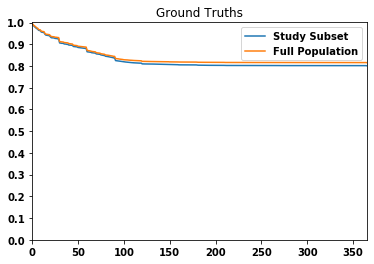

In [30]:
import numpy as np

labels, temp = get_ground_truth(Y)
labels0, temp0 = get_ground_truth(Y0)
plt.plot(labels, temp, label='Study Subset')
plt.plot(labels0, temp0, label='Full Population')
plt.legend()
plt.title('Ground Truths')
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.show()

In [31]:
df0 = df[df.murder_numg == 0]
df0.shape

(8966, 49)

In [32]:
X0 = df0.copy()
Y0 = X0[[censoring_var, predictor_var]]
X0.drop(columns=[censoring_var, predictor_var], inplace=True)
y0 = Surv.from_arrays(Y0[censoring_var], Y0[predictor_var]) # structured array to ensure correct censoring

print(X0.shape, y0.shape)

(8966, 47) (8966,)


In [33]:
df1 = df[df.murder_numg == 1]
df1.shape

(666, 49)

In [34]:
X1 = df1.copy()
Y1 = X1[[censoring_var, predictor_var]]
X1.drop(columns=[censoring_var, predictor_var], inplace=True)
y1 = Surv.from_arrays(Y1[censoring_var], Y1[predictor_var]) # structured array to ensure correct censoring

print(X1.shape, y1.shape)

(666, 47) (666,)


In [35]:
df2 = df[df.murder_numg == 2]
df2.shape

(436, 49)

In [36]:
X2 = df2.copy()
Y2 = X2[[censoring_var, predictor_var]]
X2.drop(columns=[censoring_var, predictor_var], inplace=True)
y2 = Surv.from_arrays(Y2[censoring_var], Y2[predictor_var]) # structured array to ensure correct censoring

print(X2.shape, y2.shape)

(436, 47) (436,)


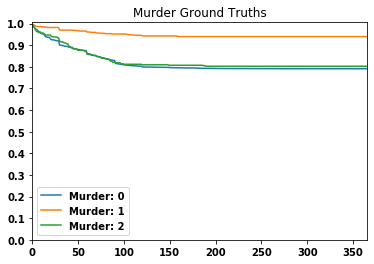

In [37]:
labels0, temp0 = get_ground_truth(Y0)
labels1, temp1 = get_ground_truth(Y1)
labels2, temp2 = get_ground_truth(Y2)
plt.plot(labels0, temp0, label='Murder: 0')
plt.plot(labels1, temp1, label='Murder: 1')
plt.plot(labels2, temp2, label='Murder: 2')
plt.legend()
plt.title('Murder Ground Truths')
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.show()